In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [2]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [3]:
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

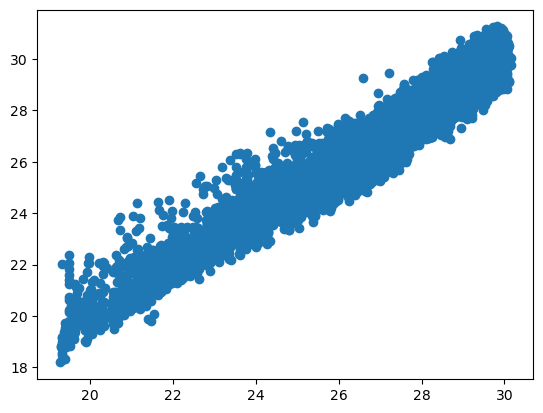

In [6]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',GradientBoostingRegressor(n_estimators=90))])
mod=GridSearchCV(estimator=mod,
                 param_grid={'model__n_estimators':range(100,111)},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [7]:
mean_absolute_error(y_test,pred)

0.40035720154941273

In [8]:
root_mean_squared_error(y_test,pred)

0.5101423113596356

In [9]:
r2_score(y_test,pred)

0.9516118635150483

In [10]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.772835,0.044474,0.031810,2.489103e-03,100,{'model__n_estimators': 100},0.956147,0.930330,0.945317,0.943931,0.010585,11
1,3.772290,0.083079,0.022754,1.013684e-02,101,{'model__n_estimators': 101},0.956185,0.930405,0.945363,0.943984,0.010569,10
2,3.748118,0.128726,0.031639,5.448998e-04,102,{'model__n_estimators': 102},0.956145,0.930471,0.945472,0.944030,0.010531,9
3,3.779185,0.150577,0.030424,1.163142e-03,103,{'model__n_estimators': 103},0.956150,0.930543,0.945503,0.944065,0.010503,8
4,3.664605,0.146789,0.031246,3.170957e-06,104,{'model__n_estimators': 104},0.956191,0.930616,0.945533,0.944113,0.010489,7
5,3.618986,0.050697,0.026036,7.359516e-03,105,{'model__n_estimators': 105},0.956223,0.930559,0.945681,0.944154,0.010533,5
6,3.626074,0.050951,0.031246,7.018853e-07,106,{'model__n_estimators': 106},0.956235,0.930501,0.945719,0.944152,0.010564,6
7,3.696185,0.101422,0.026040,7.363335e-03,107,{'model__n_estimators': 107},0.956295,0.930642,0.945731,0.944223,0.010527,4
8,3.718072,0.067280,0.031244,1.593426e-06,108,{'model__n_estimators': 108},0.956300,0.930686,0.945788,0.944258,0.010513,3
9,3.761360,0.050816,0.031247,5.150430e-07,109,{'model__n_estimators': 109},0.956308,0.930730,0.945890,0.944309,0.010502,2


In [11]:
df=pd.read_csv('evaluation.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [12]:
df['air temp.'].fillna(np.random.normal(np.mean(df['air temp.']),np.std(df['air temp.'])),inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
pred=mod.predict(df)
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([df,pred],axis=1)
df_pred.to_csv('eval_pred.csv')

In [14]:
df=pd.read_csv('data_1997_1998.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [15]:
df['air temp.'].fillna(np.random.normal(np.mean(df['air temp.']),np.std(df['air temp.'])),inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)
df.drop(['Index'],axis=1,inplace=True)

In [16]:
pred=mod.predict(df)
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([df,pred],axis=1)
df_pred.to_csv('1997_1998_pred.csv')